[View in Colaboratory](https://colab.research.google.com/github/greenrmp/MachineLearning/blob/dev/ex00_first_model.ipynb)

## 確認套件已經安裝 & Get data

In [2]:
from __future__ import print_function
!pip install -q keras
import keras
from google.colab import files
import numpy as np
from past.builtins import execfile
import numpy as np
import os

from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 請將本機端的資料 "pkgo_city66_cass5_v1.csv" 上傳到 colab 環境

In [0]:
if not os.path.exists("pkgo_city66_class5_v1.csv"):
  uploaded = files.upload()

def readInput(file):
  ''' Read input files '''
  my_data = np.genfromtxt(file, delimiter=',',skip_header=1)

  ''' The first column to the 199th column is used as input features '''
  X_train = my_data[:,0:200]
  X_train = X_train.astype('float32')

  ''' The 200-th column is the answer '''
  y_train = my_data[:,200]
  y_train = y_train.astype('int')

  ''' Convert to one-hot encoding '''
  Y_train = np_utils.to_categorical(y_train,5)

  ''' Shuffle training data '''
  X_train,Y_train = shuffle(X_train,Y_train,random_state=100)
  return X_train, Y_train

# make data #
X_train, Y_train = readInput(file="pkgo_city66_class5_v1.csv")

## 確認 Input 與 Output

In [3]:
#@title  { vertical-output: true, display-mode: "both" }
print(X_train.shape)
print(Y_train.shape)
print(" === ")

print(X_train[1,:32])
print(Y_train[:5])

(1836, 200)
(1836, 5)
 === 
[ 8.0542952e-02 -7.0215654e-01  9.0000000e+00  5.0000000e+00
  1.3000000e+01  1.1000000e+01  5.9000000e+01  1.0000000e+00
  1.5000000e+01  1.1000000e+01  2.0000000e+00  5.0000000e+00
  8.0000000e+00  1.3000000e+01  0.0000000e+00  6.6000000e+01
  2.0000000e+00  5.0000000e+00  1.1170280e-02 -8.8404727e-01
 -8.9963126e-01  1.4810755e+00  1.1207619e+00  1.8323834e+00
 -1.5321089e+00 -7.7582890e-01  7.2296715e-01 -8.8116989e-02
  1.6153218e+00  7.6169109e-01 -4.3796182e-01  0.0000000e+00]
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


## 開始建立第一個模型 
### (資料已經先替各位做過簡單的預處理囉)

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

In [5]:
#@title Build the model { vertical-output: true, display-mode: "both" }
x_input = Input(shape = [X_train.shape[1]])

x = Dense(128)(x_input)
x = Activation('sigmoid')(x)

x = Dense(256)(x)
x = Activation('sigmoid')(x)

x = Dense(5)(x)
out = Activation('softmax')(x)

sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

model_ce = Model(inputs=[x_input], outputs=[out])

model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
model_ce.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
Total para

In [6]:
#@title Train the first model { vertical-output: true, display-mode: "both" }
batch_size = 16
epochs = 30

history_ce = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
              validation_split=0.1)

Train on 1652 samples, validate on 184 samples
Epoch 1/30
1652/1652 [==============================] - 0s 182us/step - loss: 1.3626 - acc: 0.5163 - val_loss: 1.3594 - val_acc: 0.5163
Epoch 2/30
1652/1652 [==============================] - 0s 120us/step - loss: 1.3564 - acc: 0.5163 - val_loss: 1.3297 - val_acc: 0.5163
Epoch 3/30
1652/1652 [==============================] - 0s 128us/step - loss: 1.3496 - acc: 0.5163 - val_loss: 1.3287 - val_acc: 0.5163
Epoch 4/30
1652/1652 [==============================] - 0s 145us/step - loss: 1.3433 - acc: 0.5163 - val_loss: 1.3547 - val_acc: 0.5163
Epoch 5/30
1652/1652 [==============================] - 0s 127us/step - loss: 1.3422 - acc: 0.5163 - val_loss: 1.3629 - val_acc: 0.5163
Epoch 6/30
1652/1652 [==============================] - 0s 130us/step - loss: 1.3366 - acc: 0.5163 - val_loss: 1.3197 - val_acc: 0.5163
Epoch 7/30
1652/1652 [==============================] - 0s 127us/step - loss: 1.3319 - acc: 0.5163 - val_loss: 1.3000 - val_acc: 0.5163
E

Epoch 17/30
1652/1652 [==============================] - 0s 121us/step - loss: 1.2676 - acc: 0.5527 - val_loss: 1.3210 - val_acc: 0.5163
Epoch 18/30
1652/1652 [==============================] - 0s 123us/step - loss: 1.2614 - acc: 0.5533 - val_loss: 1.2276 - val_acc: 0.5272
Epoch 19/30
1652/1652 [==============================] - 0s 127us/step - loss: 1.2519 - acc: 0.5611 - val_loss: 1.2521 - val_acc: 0.5380
Epoch 20/30
1652/1652 [==============================] - 0s 128us/step - loss: 1.2500 - acc: 0.5660 - val_loss: 1.2227 - val_acc: 0.5435
Epoch 21/30
1652/1652 [==============================] - 0s 120us/step - loss: 1.2423 - acc: 0.5708 - val_loss: 1.1777 - val_acc: 0.6304
Epoch 22/30
1652/1652 [==============================] - 0s 124us/step - loss: 1.2383 - acc: 0.5763 - val_loss: 1.1781 - val_acc: 0.6304
Epoch 23/30
1652/1652 [==============================] - 0s 122us/step - loss: 1.2341 - acc: 0.5732 - val_loss: 1.1899 - val_acc: 0.5924
Epoch 24/30
1652/1652 [==================

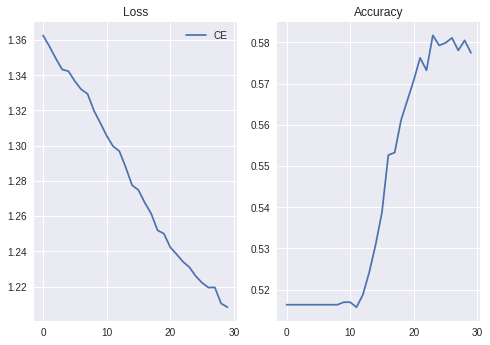

In [7]:
#@title Draw the results { vertical-output: true, display-mode: "both" }
loss_ce	= history_ce.history.get('loss')
acc_ce 	= history_ce.history.get('acc')

''' Visualize the loss and accuracy of both models'''
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.title('Loss')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.title('Accuracy')
plt.show()